In [4]:
require(ggplot2)
require(data.table)

In [27]:
# If experiment parameters change, modify this function
AddParametersAsColumns <- function(df, folderName) {
    expParams <- strsplit(folderName, "_")[[1]]
    df$groupSizeDist <- expParams[10]
    df$placementDist <- expParams[11]
    df$numColocateHosts <- expParams[12]
    df$algorithm <- expParams[16]
    df$numBitmaps <- expParams[17]
    df$numLeafsPerBitmap <- expParams[18]
    df$redundancyPerBitmap <- expParams[19]
    return(df)
}


# Turns all files of a given filname across a set of folders into a single dataset
DatasetAsDataTable <- function(filename, folders, headers) {
    df <- data.frame()
    for (folder in folders) {
       tmp <- read.table(paste(folder, filename, sep="/"), sep=",", header=FALSE)
       for (colIndex in length(headers)) {
           colnames(tmp)[colIndex] <- headers[colIndex]
       }
       tmp <- AddParametersAsColumns(tmp, folder)
       df <- rbind(df, tmp)
    }
    return(data.table(df))
}


folders <- Sys.glob("optimizer*")
plotTheme <- theme(legend.title=element_blank(), legend.position="top", legend.text=element_text(size=6))

In [ ]:
rulesForAllLeaves <- DatasetAsDataTable("rules_for_all_leafs.csv", folders, c("leafId", "numRules"))

In [37]:
head(rulesForAllLeaves)

V1,numRules,groupSizeDist,placementDist,numColocateHosts,algorithm,numBitmaps,numLeafsPerBitmap,redundancyPerBitmap
0,1000,uniform,colocate-random-random,24,exact-match,10,1,0
1,1000,uniform,colocate-random-random,24,exact-match,10,1,0
2,1000,uniform,colocate-random-random,24,exact-match,10,1,0
3,1000,uniform,colocate-random-random,24,exact-match,10,1,0
4,1000,uniform,colocate-random-random,24,exact-match,10,1,0
5,1000,uniform,colocate-random-random,24,exact-match,10,1,0


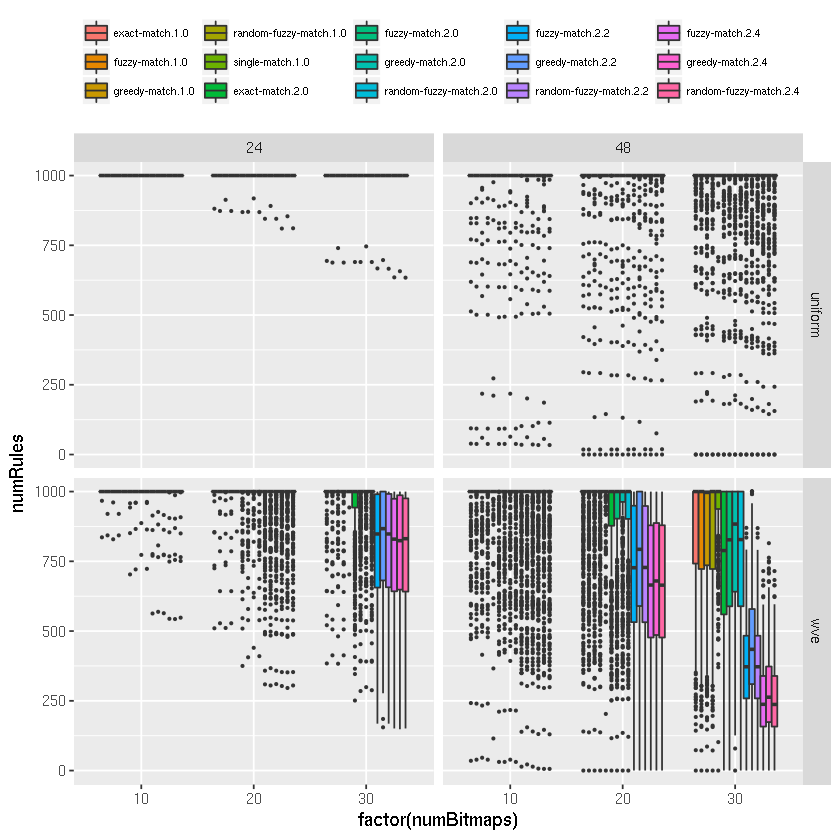

In [31]:
ggplot(rulesForAllLeaves) +
   geom_boxplot(aes(y=numRules, x=factor(numBitmaps), 
                    fill=interaction(algorithm, numLeafsPerBitmap, redundancyPerBitmap)),
                outlier.size=0.5) +
   facet_grid(groupSizeDist ~ numColocateHosts) +
   xlab("Number of bitmaps") +
   ylab("Number of rules") +
   plotTheme

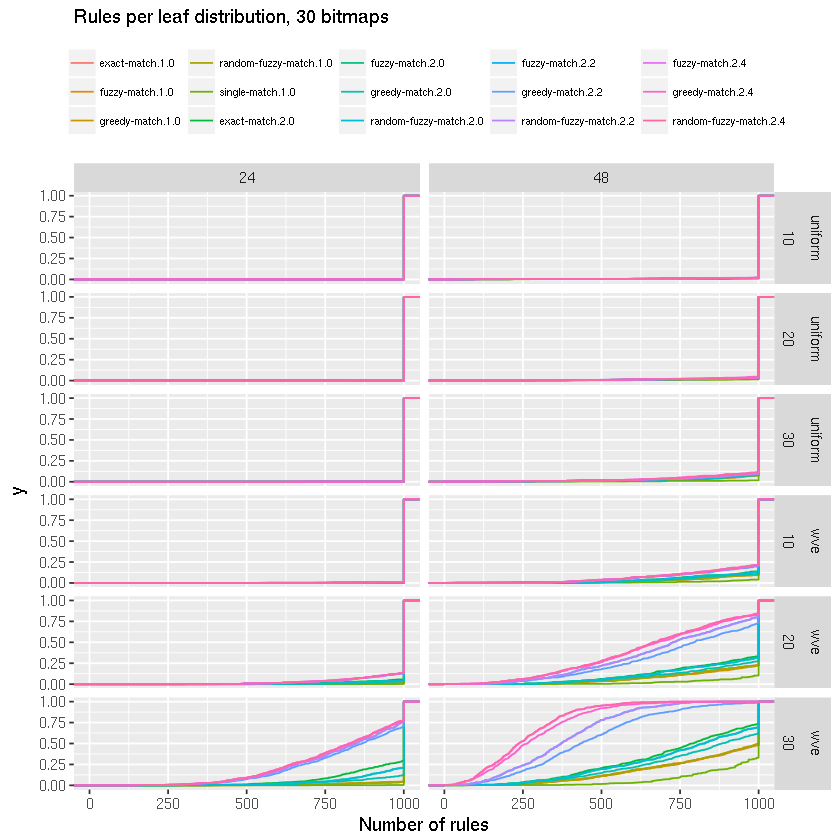

In [36]:
ggplot(rulesForAllLeaves) +
   stat_ecdf(aes(x=numRules, col=interaction(algorithm, numLeafsPerBitmap, redundancyPerBitmap))) +
   facet_grid(groupSizeDist * numBitmaps ~ numColocateHosts) +
   ggtitle("Rules per leaf distribution, 30 bitmaps") +
   xlab("Number of rules") +
   plotTheme